## load packages

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Q1

In [2]:
# Q1-1
iris = datasets.load_iris()

In [3]:
# Q1-2
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Q1-3
y = pd.DataFrame(iris['target'], columns=['target'])
y.head(5)

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
# Q1-4
df_iris = pd.concat([x,y], axis=1)
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Q1-5
df_iris = df_iris.drop(df_iris[(df_iris['target']!=0) & (df_iris['target']!=1) ].index)
df_iris.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [7]:
# Q1-6
target_class = {0: 1, 1: -1}
df_iris['target_class'] = df_iris['target'].map(target_class)
del df_iris['target']
df_iris.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_class
95,5.7,3.0,4.2,1.2,-1
96,5.7,2.9,4.2,1.3,-1
97,6.2,2.9,4.3,1.3,-1
98,5.1,2.5,3.0,1.1,-1
99,5.7,2.8,4.1,1.3,-1


In [8]:
# Q1-7 
def sign(z):
    if z > 0:
        return 1
    else:
        return -1
    
w = np.array([0.,0.,0.,0.,0.]) #初始化w設定為[0,0,0,0,0]
error = 1 #紀錄是否有錯誤分類，沒有的話error=0
iterator = 0 #紀錄更新幾次
while error != 0: #error不等於零就執行此迴圈
    error = 0
    for i in range(len(df_iris)):
        x,y = np.concatenate((np.array([1.]), np.array(df_iris.iloc[i])[:4])), np.array(df_iris.iloc[i])[4]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))

print("iteration: " + str(iterator) + "次")
print("最後所算出的w: " + str(w))

iterator: 0
x: [1.  5.1 3.5 1.4 0.2]
w: [1.  5.1 3.5 1.4 0.2]
iterator: 1
x: [1.  7.  3.2 4.7 1.4]
w: [ 0.  -1.9  0.3 -3.3 -1.2]
iterator: 2
x: [1.  5.1 3.5 1.4 0.2]
w: [ 1.   3.2  3.8 -1.9 -1. ]
iterator: 3
x: [1.  7.  3.2 4.7 1.4]
w: [ 0.  -3.8  0.6 -6.6 -2.4]
iterator: 4
x: [1.  5.1 3.5 1.4 0.2]
w: [ 1.   1.3  4.1 -5.2 -2.2]
iteration: 5次
最後所算出的w: [ 1.   1.3  4.1 -5.2 -2.2]


In [9]:
# Q1-8
def sign(z):
    if z > 0:
        return 1
    else:
        return -1
    
w = np.array([8.,8.,8.,8.,8.]) #初始化w設定為[8,8,8,8,8]
error = 1 #紀錄是否有錯誤分類，沒有的話error=0
iterator = 0 #紀錄更新幾次
while error != 0: #error不等於零就執行此迴圈
    error = 0
    for i in range(len(df_iris)):
        x,y = np.concatenate((np.array([1.]), np.array(df_iris.iloc[i])[:4])), np.array(df_iris.iloc[i])[4]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))
print("iteration: " + str(iterator) + "次")
print("最後所算出的w: " + str(w))

iterator: 0
x: [1.  7.  3.2 4.7 1.4]
w: [7.  1.  4.8 3.3 6.6]
iterator: 1
x: [1.  6.4 3.2 4.5 1.5]
w: [ 6.  -5.4  1.6 -1.2  5.1]
iterator: 2
x: [1.  5.1 3.5 1.4 0.2]
w: [ 7.  -0.3  5.1  0.2  5.3]
iterator: 3
x: [1.  7.  3.2 4.7 1.4]
w: [ 6.  -7.3  1.9 -4.5  3.9]
iterator: 4
x: [1.  5.1 3.5 1.4 0.2]
w: [ 7.  -2.2  5.4 -3.1  4.1]
iterator: 5
x: [1.  7.  3.2 4.7 1.4]
w: [ 6.  -9.2  2.2 -7.8  2.7]
iterator: 6
x: [1.  5.1 3.5 1.4 0.2]
w: [ 7.  -4.1  5.7 -6.4  2.9]
iterator: 7
x: [1.  4.9 3.  1.4 0.2]
w: [ 8.   0.8  8.7 -5.   3.1]
iterator: 8
x: [1.  7.  3.2 4.7 1.4]
w: [ 7.  -6.2  5.5 -9.7  1.7]
iterator: 9
x: [1.  5.1 3.5 1.4 0.2]
w: [ 8.  -1.1  9.  -8.3  1.9]
iterator: 10
x: [1.  5.6 2.9 3.6 1.3]
w: [  7.   -6.7   6.1 -11.9   0.6]
iterator: 11
x: [1.  5.1 3.5 1.4 0.2]
w: [  8.   -1.6   9.6 -10.5   0.8]
iteration: 12次
最後所算出的w: [  8.   -1.6   9.6 -10.5   0.8]


In [10]:
# Q1-9
newflower = np.array([ 1., 3., 2.1, 4.6, 3.3]) 
print(sign(np.dot(w,newflower)))
print("這朵鳶尾花是: target 1 (Versicolor)")

-1
這朵鳶尾花是: target 1 (Versicolor)


## Q2

In [11]:
# Q2-1
titanic = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Homework 4/Homework 4/titanic.csv')
titanic.head(20)

,PassengerId,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


In [12]:
# Q2-2
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)
titanic.head(20)

,PassengerId,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0


In [13]:
# Q2-3
class_mapping = {'1st': 1, '2nd': 2, '3rd': 3}
titanic['PClass'] = titanic['PClass'].replace(class_mapping)
titanic.head(20)

,PassengerId,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1,0.92,male,1,0
5,6,"Anderson, Mr Harry",1,47.00,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1,63.00,female,1,1
7,8,"Andrews, Mr Thomas, jr",1,39.00,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1,58.00,female,1,1
9,10,"Artagaveytia, Mr Ramon",1,71.00,male,0,0


In [14]:
# Q2-4
X = titanic[['PClass', 'Age']]
Y = titanic['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.head(20)

,PClass,Age
898,3,28.0
828,3,9.0
1218,3,28.0
743,3,28.0
1083,3,28.0
1146,3,28.0
88,1,50.0
517,2,28.0
590,2,28.0
796,3,28.0


In [15]:
# Q2-5
model = LogisticRegression()
model.fit(X_train, Y_train)
probabilities = model.predict_proba(X_test)
print(probabilities)

[[0.63992423 0.36007577]
 [0.77849024 0.22150976]
 [0.29102651 0.70897349]
 [0.52619712 0.47380288]
 [0.81242513 0.18757487]
 [0.81242513 0.18757487]
 [0.81242513 0.18757487]
 [0.54568299 0.45431701]
 [0.56502992 0.43497008]
 [0.60931597 0.39068403]
 [0.32438619 0.67561381]
 [0.81242513 0.18757487]
 [0.81242513 0.18757487]
 [0.49941469 0.50058531]
 [0.59681192 0.40318808]
 [0.77849024 0.22150976]
 [0.44092308 0.55907692]
 [0.32438619 0.67561381]
 [0.81242513 0.18757487]
 [0.78296158 0.21703842]
 [0.32438619 0.67561381]
 [0.81242513 0.18757487]
 [0.84565499 0.15434501]
 [0.66363005 0.33636995]
 [0.59051128 0.40948872]
 [0.81242513 0.18757487]
 [0.59051128 0.40948872]
 [0.82025626 0.17974374]
 [0.81242513 0.18757487]
 [0.81242513 0.18757487]
 [0.81242513 0.18757487]
 [0.32438619 0.67561381]
 [0.59051128 0.40948872]
 [0.77395336 0.22604664]
 [0.41601676 0.58398324]
 [0.55215027 0.44784973]
 [0.32438619 0.67561381]
 [0.43449465 0.56550535]
 [0.81242513 0.18757487]
 [0.81242513 0.18757487]


In [16]:
# Q2-6
error = 0
for i, v in enumerate(model.predict(X_test)):
    if v!= Y_test.values[i]:
        error+=1
print(error)

109


In [17]:
# Q2-7
predictions = model.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
print("混淆矩陣:")
print(cm)

混淆矩陣:
[[231  33]
 [ 76  54]]


In [18]:
# Q2-8
accuracy = accuracy_score(Y_test, predictions)
print("正確率:", format(accuracy, ".4f"))

正確率: 0.7234


In [19]:
# Q2-9
report = classification_report(Y_test, predictions, digits=4)
print("評估指標:")
print(report)

評估指標:
              precision    recall  f1-score   support

           0     0.7524    0.8750    0.8091       264
           1     0.6207    0.4154    0.4977       130

    accuracy                         0.7234       394
   macro avg     0.6866    0.6452    0.6534       394
weighted avg     0.7090    0.7234    0.7064       394



## Q3

In [20]:
# Q3-1
pokemon_data = pd.read_csv('C:/Users/danny/Big_Data_Analytics_and_Data_Mining/Homework 4/Homework 4/pokemon.csv', encoding='Big5')
pokemon_data

,Number,Name,Type,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,1,妙蛙種子,Grass,45,49.0,49.0,65,65,45
1,2,妙蛙草,Grass,60,62.0,63.0,80,80,60
2,3,妙蛙花Mega,Grass,80,100.0,123.0,122,120,80
3,3,妙蛙花,Grass,80,82.0,83.0,100,100,80
4,4,小火龍,Fire,39,52.0,43.0,60,50,65
...,...,...,...,...,...,...,...,...,...
889,803,毒貝比,Poison,67,73.0,67.0,73,67,73
890,804,四顎針龍,Poison,73,73.0,73.0,127,73,121
891,805,壘磊石,Rock,61,131.0,211.0,53,101,13
892,806,砰頭小丑,Fire,53,127.0,53.0,151,79,107


In [21]:
# Q3-2
pokemon_data = pokemon_data.dropna(subset=['Attack', 'Defense'])
pokemon_data

,Number,Name,Type,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,1,妙蛙種子,Grass,45,49.0,49.0,65,65,45
1,2,妙蛙草,Grass,60,62.0,63.0,80,80,60
2,3,妙蛙花Mega,Grass,80,100.0,123.0,122,120,80
3,3,妙蛙花,Grass,80,82.0,83.0,100,100,80
4,4,小火龍,Fire,39,52.0,43.0,60,50,65
...,...,...,...,...,...,...,...,...,...
889,803,毒貝比,Poison,67,73.0,67.0,73,67,73
890,804,四顎針龍,Poison,73,73.0,73.0,127,73,121
891,805,壘磊石,Rock,61,131.0,211.0,53,101,13
892,806,砰頭小丑,Fire,53,127.0,53.0,151,79,107


In [22]:
# Q3-3
selected_types = ['Fighting', 'Ghost', 'Normal']
pokemon_data = pokemon_data[pokemon_data['Type'].isin(selected_types)]
pokemon_data

,Number,Name,Type,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
20,16,波波,Normal,40,45.0,40.0,35,35,56
21,17,比比鳥,Normal,63,60.0,55.0,50,50,71
22,18,大比鳥Mega,Normal,83,80.0,80.0,135,80,121
23,18,大比鳥,Normal,83,80.0,75.0,70,70,101
24,19,小拉達,Normal,30,56.0,35.0,25,35,72
...,...,...,...,...,...,...,...,...,...
854,772,屬性：空,Normal,95,95.0,95.0,95,95,59
855,773,銀伴戰獸,Normal,95,95.0,95.0,95,95,95
861,778,謎擬Ｑ,Ghost,55,90.0,80.0,50,105,96
864,781,破破舵輪,Ghost,70,131.0,100.0,86,90,40


In [23]:
# Q3-4
X = pokemon_data[['Attack', 'Defense']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.11406225, -0.97812518],
       [-0.58638686, -0.40792355],
       [ 0.11718033,  0.54241249],
       [ 0.11718033,  0.35234528],
       [-0.7271003 , -1.16819239],
       [ 0.15235869, -0.21785635],
       [-0.58638686, -1.3582596 ],
       [ 0.46896392, -0.02778914],
       [-1.11406225, -1.73839401],
       [-0.23460327, -0.78805797],
       [-1.11406225, -1.16819239],
       [-0.23460327, -0.21785635],
       [ 0.99663931, -0.21785635],
       [ 0.82074752,  0.16227807],
       [ 1.8760983 ,  0.54241249],
       [-0.41049506, -0.40792355],
       [ 0.29307213, -0.78805797],
       [-0.93817045, -0.78805797],
       [-0.41049506,  0.54241249],
       [-0.41049506, -0.21785635],
       [ 1.5243147 , -0.48395044],
       [ 0.99663931,  0.50439905],
       [-0.76227866,  0.35234528],
       [-2.52119663, -2.30859564],
       [ 0.64485572,  0.54241249],
       [ 0.82074752,  1.11261411],
       [-1.00852717, -0.67401765],
       [-0.76227866, -0.59799076],
       [-0.58638686,

In [24]:
# Q3-5
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(pokemon_data['Type'])
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0])

In [25]:
# Q3-6
svc_model = SVC(kernel='rbf')
svc_model.fit(X_scaled, Y)

error = 0
for i, v in enumerate(svc_model.predict(X_scaled)):
    if v!= Y[i]:
        error+=1
print("錯誤個數:",error)

錯誤個數: 33


In [26]:
# Q3-7
predictions = svc_model.predict(X_scaled)
confusion_mat = confusion_matrix(Y, predictions)
print("混淆矩陣:")
print(confusion_mat)

混淆矩陣:
[[12  0 11]
 [ 4 13 12]
 [ 5  1 87]]


In [27]:
# Q3-8
accuracy = accuracy_score(Y, predictions)
print("正確率: {:.4f}".format(accuracy))

正確率: 0.7724


In [28]:
# Q3-9
f1 = f1_score(Y, predictions, average='weighted')
print("加權平均F1-score: {:.4f}".format(f1))

加權平均F1-score: 0.7572


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\danny\AppData\Local\Temp\ipykernel_11564\3185921725.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence, which shoul

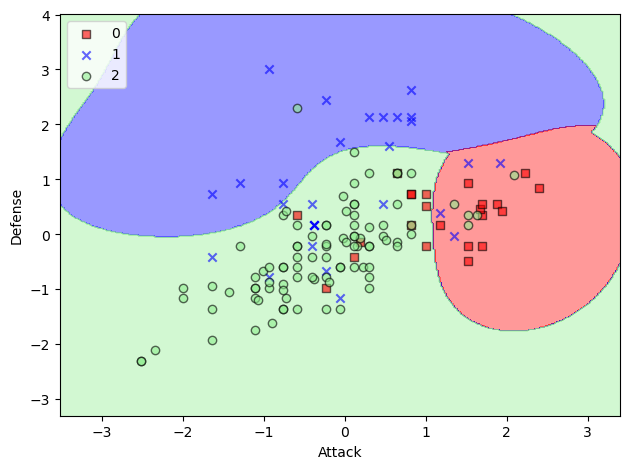

In [29]:
# Q3-10
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):  

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) 

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),  
                           np.arange(x2_min, x2_max, resolution))  
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)                                       
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)                
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),      
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
plot_decision_regions(X_scaled, Y, classifier=svc_model)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()